# SEATTLE ROAD ACCIDENT SEVERITY

<H2>Introduction</H2>

Number of accidents are raising rapidly due to increasing population and motor vehical usage. Traffic accidents have became 3rd major reason of mortality among countries by 2020. accident not only cause life loss but it also cause severe damage to both public and private property. car manufacturers are now investing large amount of money to make their car more safe for costumer. one way this can be done is, by studing past accident data. and finding observation that led to accident. many usefull insights can be made using past data. harnessing all technologies we can prevent accident to a great extent.

<h2>Buisness Problem

The main objective of this project is to analyze the past data of seattle city and find conclusions based on different factors like weather, road condition, light condition. factors like driver inattention, alchol/drug consumption.It will use various analytical techniques and machine learning classification algorithms such as logistic regression, decision tree analysis, k-nearest-neighbors, support vector machine,etc.

<h3>Approch

First of all, the data set will be analysed using data vizualisation tools and libraries in python to identify trends in collisions and parameters affecting the collisions. Then the data set will be modeled to predict collision severity. The data set mentions 2 levels of collision severity: 1- Property Damage Only Collision 2- Injury Collision The approach for modeling collision severity involves statistical modeling considering severity as a dependent variable while road coniditions, speeding, driver attention, influence of drugs/alcohol on driver, junction type where the collision occured and a few environmental factors as the independent variables.


<h3>Assumptions

A few of the columns in the data set contained categorical values, 'Y': Yes and 1. It is assumed that the "1" values correspond to 'Y':Yes and 0 corresponds to "No". It is also assumed that the data values -'Other' and 'Unknown' correspond to Null as they tell us nothing about the features in the dataset.

In [1]:
#importing importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
df=pd.read_csv(r"C:\Users\lenovo\Desktop\coursera\Data-Collisions.csv")
df.head()

E:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (33) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,SEVERITYCODE,X,Y,OBJECTID,INCKEY,COLDETKEY,REPORTNO,STATUS,ADDRTYPE,INTKEY,...,ROADCOND,LIGHTCOND,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,ST_COLCODE,ST_COLDESC,SEGLANEKEY,CROSSWALKKEY,HITPARKEDCAR
0,2,-122.323148,47.703140,1,1307,1307,3502005,Matched,Intersection,37475.0,...,Wet,Daylight,NaN,NaN,NaN,10,Entering at angle,0,0,N
1,1,-122.347294,47.647172,2,52200,52200,2607959,Matched,Block,NaN,...,Wet,Dark - Street Lights On,NaN,6354039.0,NaN,11,From same direction - both going straight - bo...,0,0,N
2,1,-122.334540,47.607871,3,26700,26700,1482393,Matched,Block,NaN,...,Dry,Daylight,NaN,4323031.0,NaN,32,One parked--one moving,0,0,N
3,1,-122.334803,47.604803,4,1144,1144,3503937,Matched,Block,NaN,...,Dry,Daylight,NaN,NaN,NaN,23,From same direction - all others,0,0,N
4,2,-122.306426,47.545739,5,17700,17700,1807429,Matched,Intersection,34387.0,...,Wet,Daylight,NaN,4028032.0,NaN,10,Entering at angle,0,0,N


In [3]:
print("This table contains rows:{} and columns:{}".format(df.shape[0],df.shape[1]))

This table contains rows:194673 and columns:38


In [4]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194673 entries, 0 to 194672
Data columns (total 38 columns):
SEVERITYCODE      194673 non-null int64
X                 189339 non-null float64
Y                 189339 non-null float64
OBJECTID          194673 non-null int64
INCKEY            194673 non-null int64
COLDETKEY         194673 non-null int64
REPORTNO          194673 non-null object
STATUS            194673 non-null object
ADDRTYPE          192747 non-null object
INTKEY            65070 non-null float64
LOCATION          191996 non-null object
EXCEPTRSNCODE     84811 non-null object
EXCEPTRSNDESC     5638 non-null object
SEVERITYCODE.1    194673 non-null int64
SEVERITYDESC      194673 non-null object
COLLISIONTYPE     189769 non-null object
PERSONCOUNT       194673 non-null int64
PEDCOUNT          194673 non-null int64
PEDCYLCOUNT       194673 non-null int64
VEHCOUNT          194673 non-null int64
INCDATE           194673 non-null object
INCDTTM           194673 non-null obje

In [5]:
df.isnull().sum()

SEVERITYCODE           0
X                   5334
Y                   5334
OBJECTID               0
INCKEY                 0
COLDETKEY              0
REPORTNO               0
STATUS                 0
ADDRTYPE            1926
INTKEY            129603
LOCATION            2677
EXCEPTRSNCODE     109862
EXCEPTRSNDESC     189035
SEVERITYCODE.1         0
SEVERITYDESC           0
COLLISIONTYPE       4904
PERSONCOUNT            0
PEDCOUNT               0
PEDCYLCOUNT            0
VEHCOUNT               0
INCDATE                0
INCDTTM                0
JUNCTIONTYPE        6329
SDOT_COLCODE           0
SDOT_COLDESC           0
INATTENTIONIND    164868
UNDERINFL           4884
WEATHER             5081
ROADCOND            5012
LIGHTCOND           5170
PEDROWNOTGRNT     190006
SDOTCOLNUM         79737
SPEEDING          185340
ST_COLCODE            18
ST_COLDESC          4904
SEGLANEKEY             0
CROSSWALKKEY           0
HITPARKEDCAR           0
dtype: int64

there are many columns like EXCEPTRSNCODE,PEDROWNOTGRNT,SDOTCOLNUM,SPEEDING,etc which have too many null value and can't be used as a feature so we will drop these columns. we will also drop few other colums which cannot be used as features 

In [6]:
drop_columns=['X', 'Y', 'OBJECTID', 'INCKEY', 'COLDETKEY', 'REPORTNO','STATUS',"INTKEY",'EXCEPTRSNCODE',
       'EXCEPTRSNDESC',"INATTENTIONIND","PEDROWNOTGRNT","SPEEDING",'SEVERITYCODE.1','SDOT_COLCODE', 'SDOT_COLDESC','SDOTCOLNUM','SEGLANEKEY', 'CROSSWALKKEY']
df.drop(drop_columns,axis=1,inplace=True)


In [7]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,Intersection,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,10,Entering at angle,N
1,1,Block,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,Block,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,32,One parked--one moving,N
3,1,Block,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,23,From same direction - all others,N
4,2,Intersection,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,10,Entering at angle,N


In [8]:
#dropping out all null values
df.dropna(inplace=True)

In [9]:
#now we have zero null values except unknown and other category
df.isnull().sum()

SEVERITYCODE     0
ADDRTYPE         0
LOCATION         0
SEVERITYDESC     0
COLLISIONTYPE    0
PERSONCOUNT      0
PEDCOUNT         0
PEDCYLCOUNT      0
VEHCOUNT         0
INCDATE          0
INCDTTM          0
JUNCTIONTYPE     0
UNDERINFL        0
WEATHER          0
ROADCOND         0
LIGHTCOND        0
ST_COLCODE       0
ST_COLDESC       0
HITPARKEDCAR     0
dtype: int64

Text(0,0.5,'accident counts')

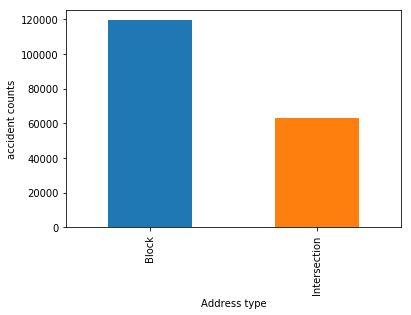

In [10]:
g1=df.ADDRTYPE.value_counts().plot(kind="bar")
g1.set_xlabel("Address type")
g1.set_ylabel("accident counts")

In [11]:
#encoding ADDRTYPE field to 0,1
e1=LabelEncoder()
df.ADDRTYPE=e1.fit_transform(df.ADDRTYPE)

In [12]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,Angles,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,10,Entering at angle,N
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,Sideswipe,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,Parked Car,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,32,One parked--one moving,N
3,1,0,2ND AVE BETWEEN MARION ST AND MADISON ST,Property Damage Only Collision,Other,3,0,0,3,2013/03/29 00:00:00+00,3/29/2013 9:26:00 AM,Mid-Block (not related to intersection),N,Clear,Dry,Daylight,23,From same direction - all others,N
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,Angles,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,10,Entering at angle,N


this graph shows that 120000+ accident took place on Block address type. 

In [13]:
#now we will explore COLLISIONTYPE field
df.COLLISIONTYPE.unique()

array(['Angles', 'Sideswipe', 'Parked Car', 'Other', 'Cycles',
       'Rear Ended', 'Head On', 'Left Turn', 'Pedestrian', 'Right Turn'],
      dtype=object)

In [14]:
#dropping other category because it does not give any insight
df=df[df.COLLISIONTYPE!="Other"]
df.shape

(159800, 19)

Text(0.5,1,'Number of Collisions at different collision category')

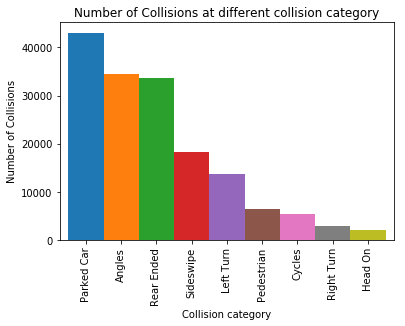

In [15]:
df.COLLISIONTYPE.value_counts().plot(kind="bar",width=1)
plt.xlabel("Collision category")
plt.ylabel("Number of Collisions")
plt.title("Number of Collisions at different collision category")

In the above graph it can be observed that major accident occur when a parked car is hit. this means that we need to focus more on providing more safe place for parking. so that car don't bump into parked cars.

In [16]:
#encoding COLLISIONTYPE field to numeric value
e2=LabelEncoder()
df.COLLISIONTYPE=e2.fit_transform(df.COLLISIONTYPE)
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,10,Entering at angle,N
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,32,One parked--one moving,N
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,10,Entering at angle,N
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),N,Clear,Dry,Daylight,10,Entering at angle,N


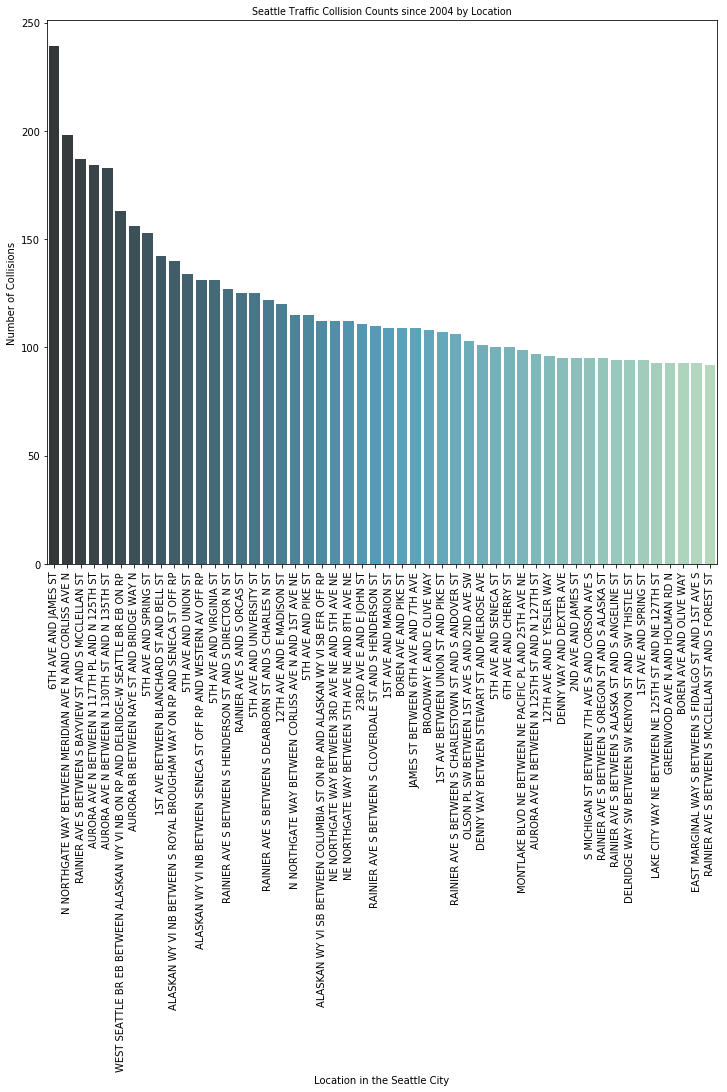

In [17]:
#now we will take look at LOCATION
loc_df=pd.DataFrame(df.LOCATION.value_counts().sort_values(ascending=False))
loc_df=loc_df[:50]
plt.figure(figsize=(12,10))
sns.barplot(data=loc_df,x=loc_df.index,y="LOCATION",palette=("GnBu_d"))

sns.set_context("paper")
plt.title('Seattle Traffic Collision Counts since 2004 by Location')
plt.xlabel('Location in the Seattle City')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=90)
plt.show()


From the above graph we know that close to 250 accidents have occured at 6TH Ave and james st. we can conculde that traffic department need to focus on this street

In [18]:
df.head()
df.SEVERITYDESC.value_counts()

Property Damage Only Collision    109204
Injury Collision                   50596
Name: SEVERITYDESC, dtype: int64

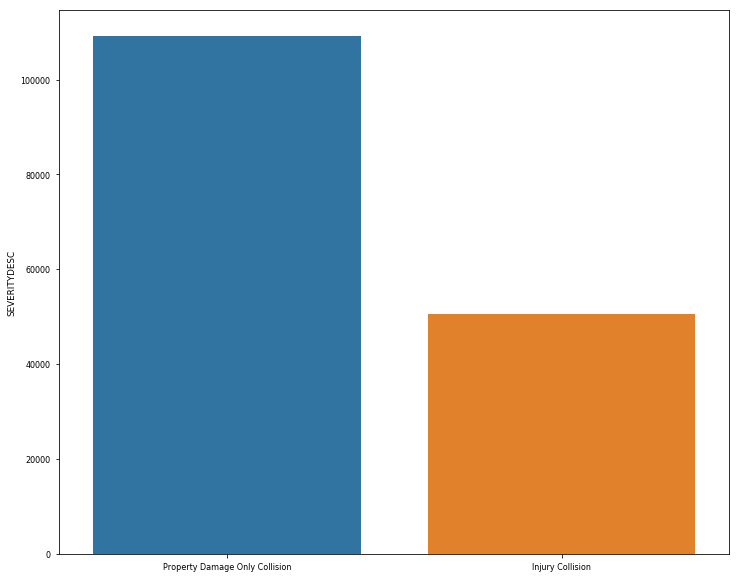

In [19]:
#vizulizing SEVERITYDESC
s_df=pd.DataFrame(df.SEVERITYDESC.value_counts().sort_values(ascending=False))
plt.figure(figsize=(12,10))
sns.barplot(data=s_df,x=s_df.index,y="SEVERITYDESC")

as you can see most injuries damage is caused only to property. note: this column is only for visualization beacuse it is just a description of our target label(SEVERITYCODE)

In [20]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,At Intersection (intersection related),N,Overcast,Wet,Daylight,10,Entering at angle,N
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,Mid-Block (not related to intersection),0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,Mid-Block (not related to intersection),0,Overcast,Dry,Daylight,32,One parked--one moving,N
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,At Intersection (intersection related),0,Raining,Wet,Daylight,10,Entering at angle,N
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,At Intersection (intersection related),N,Clear,Dry,Daylight,10,Entering at angle,N


In [21]:
#now we will process JUNCTIONTYPE column
df=df[df.JUNCTIONTYPE!="Unknown"]# remove rows having unknown in this column
df.JUNCTIONTYPE.value_counts()


Mid-Block (not related to intersection)              74145
At Intersection (intersection related)               57741
Mid-Block (but intersection related)                 19219
Driveway Junction                                     6754
At Intersection (but not related to intersection)     1810
Ramp Junction                                          128
Name: JUNCTIONTYPE, dtype: int64

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

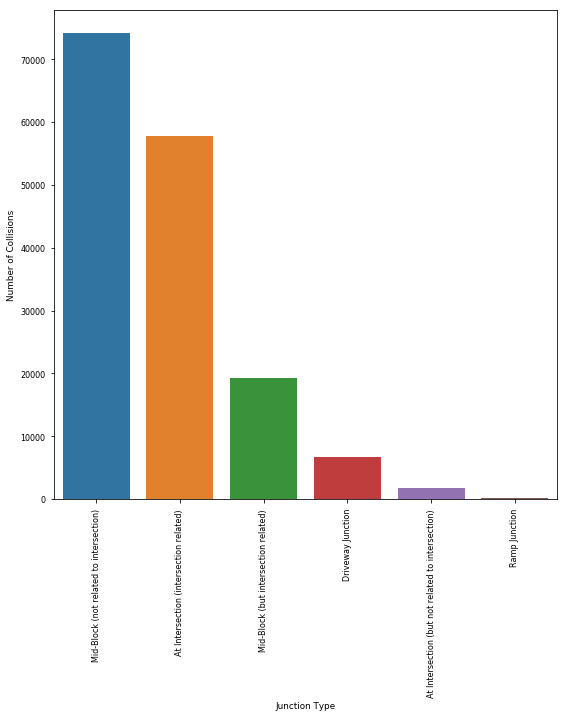

In [22]:
#vizulization
j_df=pd.DataFrame(df.JUNCTIONTYPE.value_counts())
plt.figure(figsize=(9,9))
sns.barplot(data=j_df,x=j_df.index,y="JUNCTIONTYPE")

plt.xlabel('Junction Type')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=90)

It can be seen that the number of collisions that take place at the intersection of roads or intersection related collisions are more than those not related to intersections. This information can be used to make rules specifically for the intersections. same goes with making rules for mid block.

In [23]:
#encoding
en3=LabelEncoder()
df.JUNCTIONTYPE=en3.fit_transform(df.JUNCTIONTYPE)
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,1,N,Overcast,Wet,Daylight,10,Entering at angle,N
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,4,0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,4,0,Overcast,Dry,Daylight,32,One parked--one moving,N
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,1,0,Raining,Wet,Daylight,10,Entering at angle,N
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,1,N,Clear,Dry,Daylight,10,Entering at angle,N


In [24]:
#now we can process UNDERINFL column
df.UNDERINFL.value_counts()
df.UNDERINFL=df.UNDERINFL.apply(lambda x:0 if x in ["0","N"] else 1)
df.UNDERINFL.value_counts()

0    153359
1      6438
Name: UNDERINFL, dtype: int64

Text(0,0.5,'Number of Collisions')

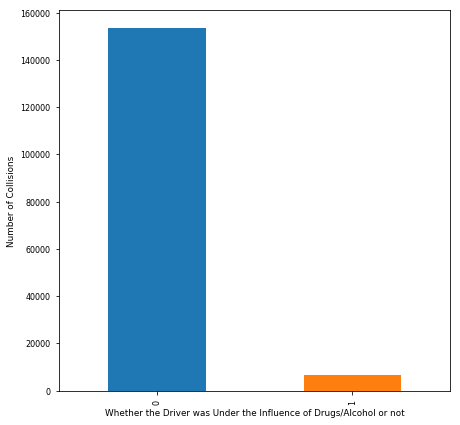

In [25]:
plt.figure(figsize=(7,7))
df.UNDERINFL.value_counts().plot(kind="bar")
plt.xlabel("Whether the Driver was Under the Influence of Drugs/Alcohol or not")
plt.ylabel("Number of Collisions")

In [26]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,1,0,Overcast,Wet,Daylight,10,Entering at angle,N
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,4,0,Raining,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,4,0,Overcast,Dry,Daylight,32,One parked--one moving,N
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,1,0,Raining,Wet,Daylight,10,Entering at angle,N
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,1,0,Clear,Dry,Daylight,10,Entering at angle,N


In [27]:
#now we will process WEATHER column
df.WEATHER.value_counts()
df=df[df.WEATHER!="Unknown"]
df=df[df.WEATHER!="Other"]
df.WEATHER.value_counts()

Clear                       96050
Raining                     27457
Overcast                    23381
Snowing                       694
Fog/Smog/Smoke                433
Sleet/Hail/Freezing Rain       84
Blowing Sand/Dirt              46
Severe Crosswind               16
Partly Cloudy                   4
Name: WEATHER, dtype: int64

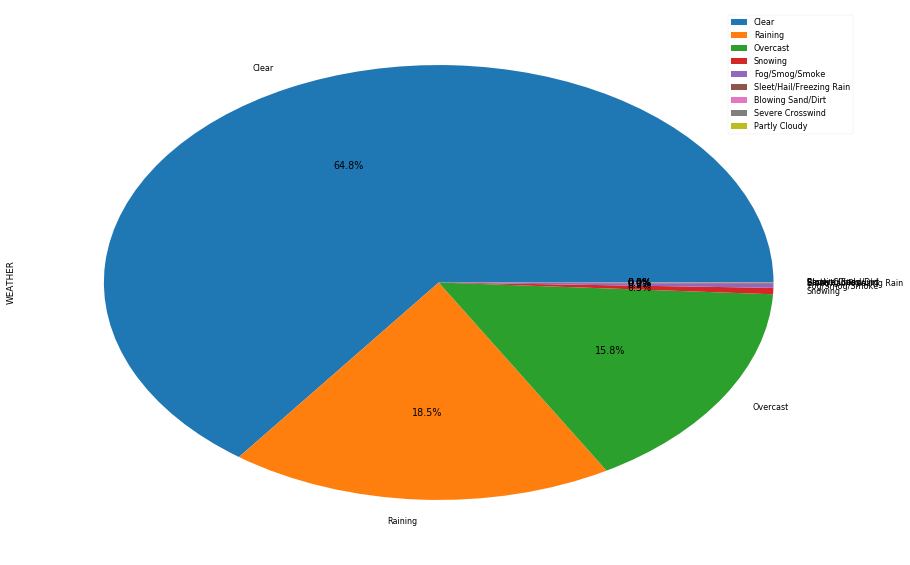

In [28]:
#visulisation
w_df=pd.DataFrame(df.WEATHER.value_counts())
#sns.barplot(data=w_df,x=w_df.index,y="WEATHER")
w_df.plot(kind="pie",y="WEATHER",figsize=(15,10),autopct='%1.1f%%')

##### we can see here approx 65% accident occur in clear weather and 18.5% in raining weather

In [29]:
df.WEATHER.value_counts()

Clear                       96050
Raining                     27457
Overcast                    23381
Snowing                       694
Fog/Smog/Smoke                433
Sleet/Hail/Freezing Rain       84
Blowing Sand/Dirt              46
Severe Crosswind               16
Partly Cloudy                   4
Name: WEATHER, dtype: int64

In [30]:
 #encoding
en4=LabelEncoder()
df.WEATHER=en4.fit_transform(df.WEATHER)


In [31]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,1,0,3,Wet,Daylight,10,Entering at angle,N
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,4,0,5,Wet,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,4,0,3,Dry,Daylight,32,One parked--one moving,N
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,1,0,5,Wet,Daylight,10,Entering at angle,N
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,1,0,1,Dry,Daylight,10,Entering at angle,N


In [32]:
#processing ROADCOND column
df=df[df.ROADCOND!="Other"]
df=df[df.ROADCOND!="Unknown"]

df.ROADCOND.value_counts()


Dry               106909
Wet                38982
Ice                  715
Snow/Slush           692
Standing Water        51
Sand/Mud/Dirt         30
Oil                   23
Name: ROADCOND, dtype: int64

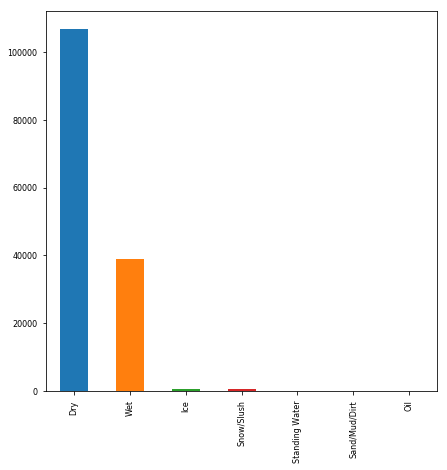

In [33]:
#visulization
plt.figure(figsize=(7,7))
df.ROADCOND.value_counts().plot(kind="bar")

In [34]:
#enoding
en5=LabelEncoder()
df.ROADCOND=en5.fit_transform(df.ROADCOND)
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,1,0,3,6,Daylight,10,Entering at angle,N
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,4,0,5,6,Dark - Street Lights On,11,From same direction - both going straight - bo...,N
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,4,0,3,0,Daylight,32,One parked--one moving,N
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,1,0,5,6,Daylight,10,Entering at angle,N
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,1,0,1,0,Daylight,10,Entering at angle,N


In [35]:
#processing LIGHTCOND column
df=df[df.LIGHTCOND!="Other"]
df=df[df.LIGHTCOND!="Unknown"]

df.LIGHTCOND.value_counts()

Daylight                    98831
Dark - Street Lights On     37642
Dusk                         4907
Dawn                         1954
Dark - No Street Lights      1041
Dark - Street Lights Off      891
Dark - Unknown Lighting         6
Name: LIGHTCOND, dtype: int64

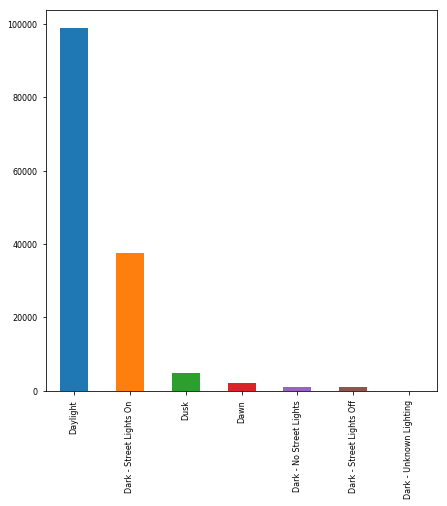

In [36]:
#visulization
plt.figure(figsize=(7,7))
df.LIGHTCOND.value_counts().plot(kind="bar")

In [37]:
en6=LabelEncoder()
df.LIGHTCOND=en5.fit_transform(df.LIGHTCOND)
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,1,0,3,6,5,10,Entering at angle,N
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,4,0,5,6,2,11,From same direction - both going straight - bo...,N
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,4,0,3,0,5,32,One parked--one moving,N
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,1,0,5,6,5,10,Entering at angle,N
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,1,0,1,0,5,10,Entering at angle,N


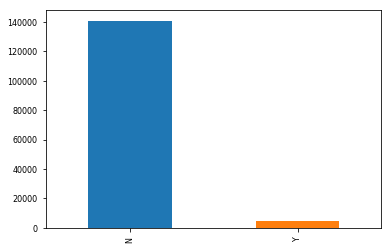

In [38]:
df.HITPARKEDCAR.value_counts().plot(kind="bar")


#### here we can see that in most cases both the cars were in motion


In [39]:
en7=LabelEncoder()
df.HITPARKEDCAR=en5.fit_transform(df.HITPARKEDCAR)
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,1,0,3,6,5,10,Entering at angle,0
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,4,0,5,6,2,11,From same direction - both going straight - bo...,0
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,4,0,3,0,5,32,One parked--one moving,0
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,1,0,5,6,5,10,Entering at angle,0
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,1,0,1,0,5,10,Entering at angle,0


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text xticklabel objects>)

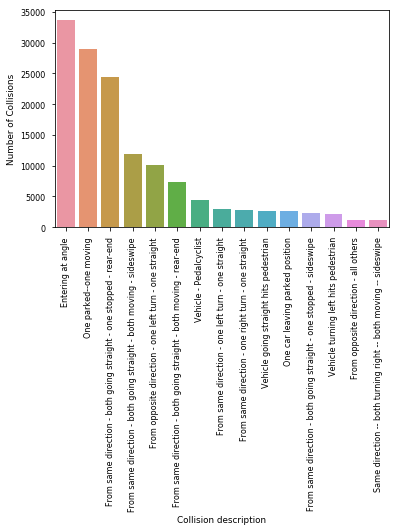

In [40]:
s_df=pd.DataFrame(df.ST_COLDESC.value_counts())
s_df=s_df[:15]
sns.barplot(data=s_df,x=s_df.index,y="ST_COLDESC")

plt.xlabel('Collision description')
plt.ylabel('Number of Collisions')
plt.xticks(rotation=90)

here we can conclude that most accident occour when a car take turn a steep angle. this create a blindspot as driver can see ahead because of obstacle. resulting in accident

In [41]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,3/27/2013 2:54:00 PM,1,0,3,6,5,10,Entering at angle,0
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,12/20/2006 6:55:00 PM,4,0,5,6,2,11,From same direction - both going straight - bo...,0
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,11/18/2004 10:20:00 AM,4,0,3,0,5,32,One parked--one moving,0
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,1/28/2004 8:04:00 AM,1,0,5,6,5,10,Entering at angle,0
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,4/20/2019 5:42:00 PM,1,0,1,0,5,10,Entering at angle,0


In [42]:
df['INCDTTM'] = pd.to_datetime(df['INCDTTM'])

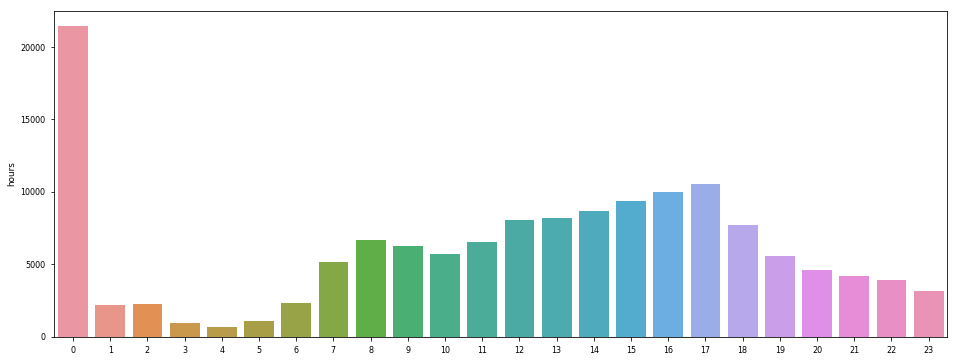

In [45]:
df['hours'] = df['INCDTTM'].dt.hour
grouped=pd.DataFrame(df['hours'].value_counts())
plt.figure(figsize=(16,6))
sns.barplot(data=grouped,x=grouped.index,y="hours")

here we can clearly see major accident occured during midnight, other than this high accident rate is at 5pm


In [46]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,INCDTTM,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,hours
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,2013-03-27 14:54:00,1,0,3,6,5,10,Entering at angle,0,14
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,2006-12-20 18:55:00,4,0,5,6,2,11,From same direction - both going straight - bo...,0,18
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,2004-11-18 10:20:00,4,0,3,0,5,32,One parked--one moving,0,10
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,2004-01-28 08:04:00,1,0,5,6,5,10,Entering at angle,0,8
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,2019-04-20 17:42:00,1,0,1,0,5,10,Entering at angle,0,17


In [47]:
df["total_person"]=df["PERSONCOUNT"]+df["PEDCOUNT"]+df["PEDCYLCOUNT"]
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,...,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,hours,total_person
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,...,1,0,3,6,5,10,Entering at angle,0,14,2
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,...,4,0,5,6,2,11,From same direction - both going straight - bo...,0,18,2
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,...,4,0,3,0,5,32,One parked--one moving,0,10,4
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,...,1,0,5,6,5,10,Entering at angle,0,8,2
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,...,1,0,1,0,5,10,Entering at angle,0,17,2


Text(0,0.5,'Total number of collision')

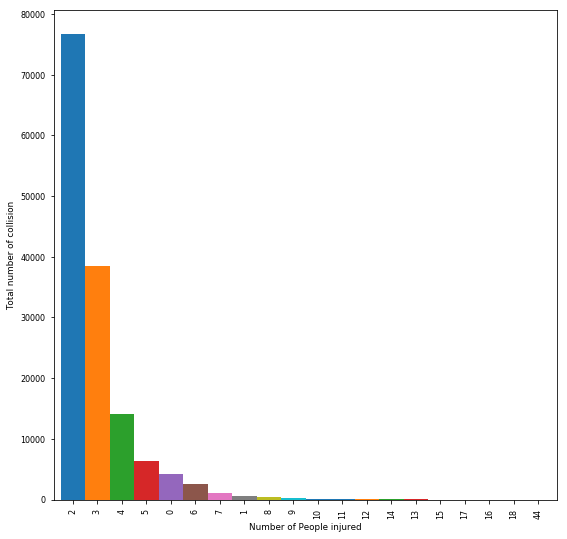

In [53]:
plt.figure(figsize=(9,9))
df["total_person"].value_counts()[:20].plot(kind="bar",width=1)
plt.xlabel("Number of People injured")
plt.ylabel("Total number of collision")

In most of the cases only 2 peoples were injured whereas in around 4000 cases 3 peoples were injured.

In [54]:
df.head()

,SEVERITYCODE,ADDRTYPE,LOCATION,SEVERITYDESC,COLLISIONTYPE,PERSONCOUNT,PEDCOUNT,PEDCYLCOUNT,VEHCOUNT,INCDATE,...,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,ST_COLCODE,ST_COLDESC,HITPARKEDCAR,hours,total_person
0,2,1,5TH AVE NE AND NE 103RD ST,Injury Collision,0,2,0,0,2,2013/03/27 00:00:00+00,...,1,0,3,6,5,10,Entering at angle,0,14,2
1,1,0,AURORA BR BETWEEN RAYE ST AND BRIDGE WAY N,Property Damage Only Collision,8,2,0,0,2,2006/12/20 00:00:00+00,...,4,0,5,6,2,11,From same direction - both going straight - bo...,0,18,2
2,1,0,4TH AVE BETWEEN SENECA ST AND UNIVERSITY ST,Property Damage Only Collision,4,4,0,0,3,2004/11/18 00:00:00+00,...,4,0,3,0,5,32,One parked--one moving,0,10,4
4,2,1,SWIFT AVE S AND SWIFT AV OFF RP,Injury Collision,0,2,0,0,2,2004/01/28 00:00:00+00,...,1,0,5,6,5,10,Entering at angle,0,8,2
5,1,1,24TH AVE NW AND NW 85TH ST,Property Damage Only Collision,0,2,0,0,2,2019/04/20 00:00:00+00,...,1,0,1,0,5,10,Entering at angle,0,17,2


#### so as our data visulization and exploration is over. we can remove other columns which are not usefull for making model

In [57]:
df.drop({"LOCATION","SEVERITYDESC","PERSONCOUNT","PEDCOUNT","PEDCYLCOUNT","INCDATE","ST_COLCODE","ST_COLDESC","INCDTTM","hours"},inplace=True,axis=1)

In [60]:
#converting target columncategorical values to 0 and 1
df.SEVERITYCODE=df.SEVERITYCODE.apply(lambda x:x-1)

In [61]:
df.head()

,SEVERITYCODE,ADDRTYPE,COLLISIONTYPE,VEHCOUNT,JUNCTIONTYPE,UNDERINFL,WEATHER,ROADCOND,LIGHTCOND,HITPARKEDCAR,total_person
0,1,1,0,2,1,0,3,6,5,0,2
1,0,0,8,2,4,0,5,6,2,0,2
2,0,0,4,3,4,0,3,0,5,0,4
4,1,1,0,2,1,0,5,6,5,0,2
5,0,1,0,2,1,0,1,0,5,0,2


### CORELATION HEATMAP

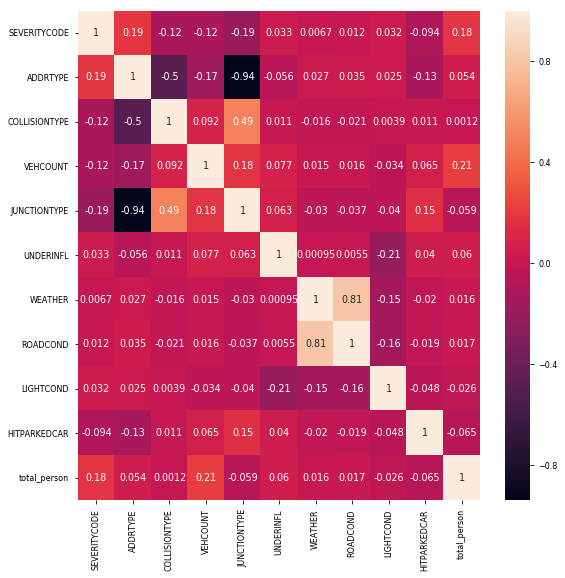

In [80]:
plt.figure(figsize=(9,9))
sns.heatmap(df.corr(),annot=True)

In [66]:
#SEPRATING FEATURES AND LABEL IN DIFFERENT VARIABLES
X=np.asarray(df.iloc[:,1:])
Y=np.asarray(df.SEVERITYCODE)

In [67]:
#Now we wil use standardscaler Standardize features by removing the mean and scaling to unit variance
ss=StandardScaler()
X=ss.fit_transform(X)


In [68]:
#now we will split our dataset for training and testing
X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)


Train set: (116217, 10) (116217,)
Test set: (29055, 10) (29055,)


### LOGISTIC REGRESSION

In [69]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
LR

LogisticRegression(C=0.01, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [70]:
lr_pred= LR.predict(X_test)

### K- Nearest Neighbour

In [71]:
from sklearn.neighbors import KNeighborsClassifier
kNN_model = KNeighborsClassifier(n_neighbors=4).fit(X_train,y_train)

In [72]:
knn_pred=kNN_model.predict(X_test)

### decision Tree

In [73]:
from sklearn.tree import DecisionTreeClassifier
model_dt = DecisionTreeClassifier(criterion="entropy", max_depth = 5)
model_dt.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=5, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [74]:
dt_pred=model_dt.predict(X_test)

## accuracy calculation

In [75]:
#importing important libraries
from sklearn.metrics import jaccard_similarity_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [76]:
#accuracy score
print("logistic accuracy score:",(accuracy_score(y_test,lr_pred)))
print("KNN accuracy score:",(accuracy_score(y_test,knn_pred)))
print("Decision Tree accuracy score:",(accuracy_score(y_test,dt_pred)))

logistic accuracy score: 0.7049389089657546
KNN accuracy score: 0.7178454654964722
Decision Tree accuracy score: 0.7285148855618654


In [77]:
print("logistic f1-Score:",(f1_score(y_test,lr_pred,average='weighted')))
print("KNN f1-Score",(f1_score(y_test,knn_pred,average='weighted')))
print("logistic f1-Score",(f1_score(y_test,dt_pred,average='weighted')))

logistic f1-Score: 0.6639157857705623
KNN f1-Score 0.6894476662025544
logistic f1-Score 0.6844969053433811


## RESULT


We can see that our all 3 algorithm can predict the severity of an collision upto an accuracy of 72%

## DISCUSSION

hence we can see that major factor that lead to colision are collision type, weather condition,road condition,light condition. we can use this model with little or no change if we want to use it for some other city, because ever place may have its own category to classify the severity of accident. features like weather,road,light can be used to determine that will collision occour or not. for determining severity of accident features like people count, vehical count, speed,etc. can be used 

## CONCLUSION

Accidents are matter of great concern both people and government should take it seriously, place specific rules should also be made. people should be made aware of rules, combined work of people, government and science can reduce accident in upcomming years.